In [1]:
import re
import pandas as pd
from konlpy.tag import Okt
from gensim import corpora, models

stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '과', '와', '의', '로', '으로', '하다', '이다','한', '했다', '하고' ,'인','적','한','상'
    ,'게', '거', '말', '간', '축', '책', '작가', '이야기', '작품', '선', '란', '개', '다시', '독자', '베스트셀러', '정세랑', '김영하', '스', '대', '됭',
    '곤', '위', '된다', '지', '윤재', '출', '속', '소설', '장편소설', '자이니치', '사라마구','되었다','못','되어','위해','될','서','쥐','배',
    '하여','초','급'
    # 추가적인 불용어 추가
]

# 데이터 로드
data = pd.read_csv(r"한국외대_전처리_완료.csv")  

# 전처리를 위한 토크나이저 생성
tokenizer = Okt()

# 전처리 함수 정의
def preprocess_text(text):
    tokens = tokenizer.morphs(text)  # 형태소 분석
    tokens = [re.sub('[\[\],\']', '', token) for token in tokens]  # '['와 ']' 사이의 문자 및 ',' 제거
    tokens = [token for token in tokens if token not in stopwords]  # 불용어 제거
    tokens = [token for token in tokens if token]  # Remove empty tokens
    # 추가적인 전처리 작업 수행
    return tokens

In [2]:
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
import nltk

In [3]:
# 텍스트 전처리
data['preprocessed'] = data['책소개'].apply(preprocess_text) 

In [4]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [5]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
문법: 0.0129
한국어: 0.0122
표현: 0.0065
세계: 0.0059
내용: 0.0052
하며: 0.0046
데: 0.0040
상황: 0.0039
한강: 0.0039
현실: 0.0033

토픽 2:
세계: 0.0078
메르켈: 0.0073
대한: 0.0061
정치: 0.0052
독일: 0.0052
처칠: 0.0052
가장: 0.0043
한자: 0.0043
돈: 0.0039
용기: 0.0039

토픽 3:
가장: 0.0049
부: 0.0048
세계: 0.0048
모든: 0.0039
대화: 0.0039
인문학: 0.0039
현실: 0.0039
영혜: 0.0039
하루키: 0.0039
판: 0.0030

토픽 4:
국가: 0.0085
비극: 0.0066
로미오: 0.0059
줄리엣: 0.0053
행동: 0.0046
셰익스피어: 0.0046
문제: 0.0040
사랑: 0.0040
성공: 0.0040
영문법: 0.0040

토픽 5:
꿈: 0.0073
제공: 0.0053
권: 0.0053
교재: 0.0053
독학: 0.0043
스페인어: 0.0043
학습자: 0.0043
달러: 0.0043
구트: 0.0043
자료: 0.0043



In [6]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.38512392061834405


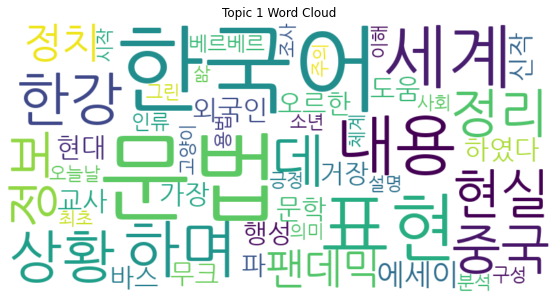

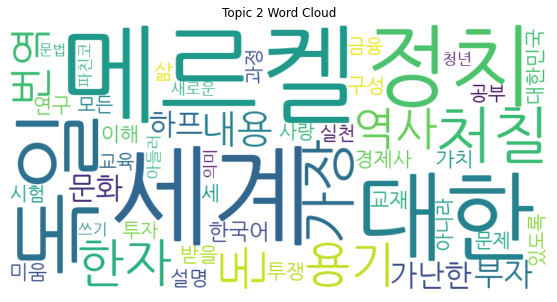

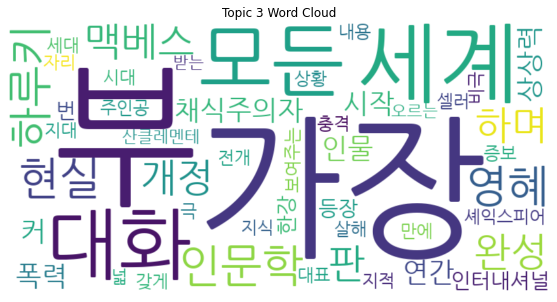

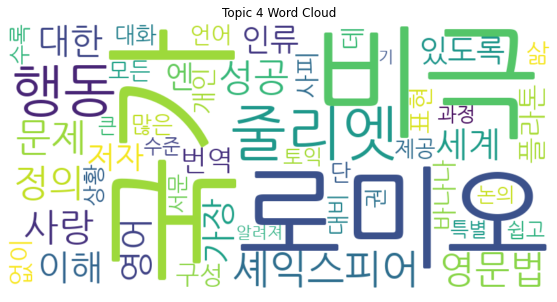

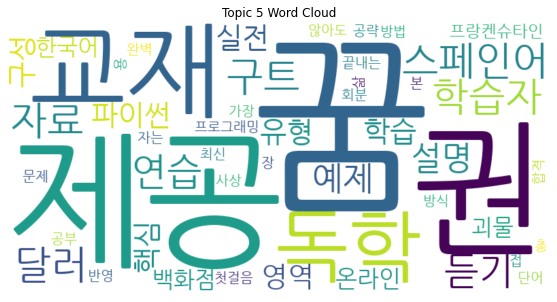

In [7]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()

In [8]:
# 텍스트 전처리
data['preprocessed'] = data['저자소개'].apply(preprocess_text) 

In [9]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [10]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
셰익스피어: 0.0145
비극: 0.0067
세계: 0.0055
개미: 0.0050
대한: 0.0046
대학: 0.0046
세: 0.0042
미국: 0.0042
교육: 0.0042
베르베르: 0.0042

토픽 2:
세계: 0.0095
독일: 0.0078
미국: 0.0073
세: 0.0067
국제: 0.0051
시작: 0.0051
후: 0.0045
투자: 0.0045
정치: 0.0035
정치학: 0.0034

토픽 3:
영어: 0.0102
언어: 0.0077
이화여자대: 0.0077
문학상: 0.0070
원: 0.0051
발표: 0.0051
박사: 0.0051
노르웨이: 0.0051
교육: 0.0045
강사: 0.0045

토픽 4:
철학: 0.0117
대학교: 0.0090
교수: 0.0082
인도: 0.0078
연구: 0.0077
아들러: 0.0063
소크라테스: 0.0063
학회: 0.0055
활동: 0.0048
역사: 0.0048

토픽 5:
경제학: 0.0061
셸리: 0.0061
대화: 0.0052
기원전: 0.0051
그녀: 0.0051
인문학: 0.0041
팟캐스트: 0.0041
지적: 0.0041
그리스: 0.0041
교수: 0.0041



In [11]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.33931373266730247


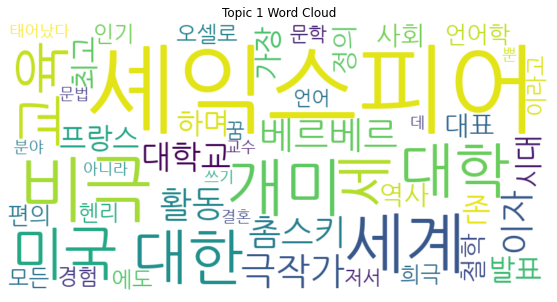

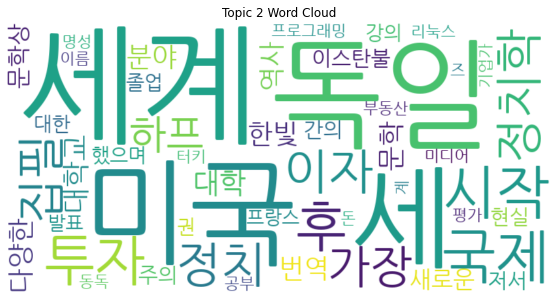

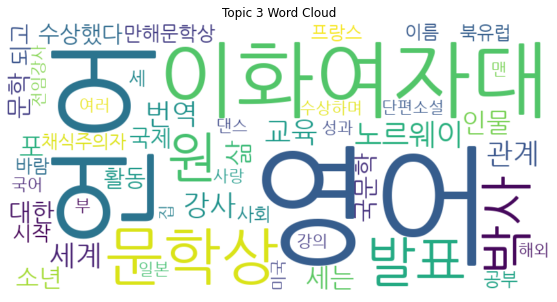

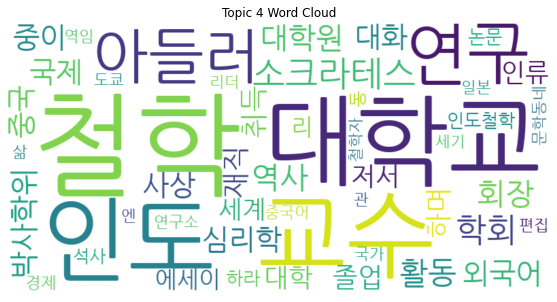

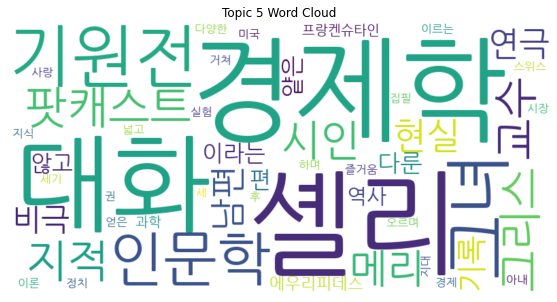

In [12]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()